# 텐서플로 임포트

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# 선형 회귀 모델

In [12]:
import pandas as pd
import numpy as np

x = [-3,  31,  -11,  4,  0,  22, -2, -5, -25, -14]
y = [ -2,   32,   -10,   5,  1,   23,  -1,  -4, -24,  -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


array([ -2,  32, -10,   5,   1,  23,  -1,  -4, -24, -13])

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))
#unit layer 갯수,

C:\Users\fsiedu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
model.fit(X_train, y_train, epochs=5000, verbose=0)

In [21]:
model.weights

[<KerasVariable shape=(1, 1), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>]

In [10]:
test_x = np.array([11, 12, 13]).reshape(3, 1)
test_x

array([[11],
       [12],
       [13]])

In [11]:
model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[11.901844],
       [12.893165],
       [13.884485]], dtype=float32)

# MNIST dataset

In [26]:
# MNIST DATA
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


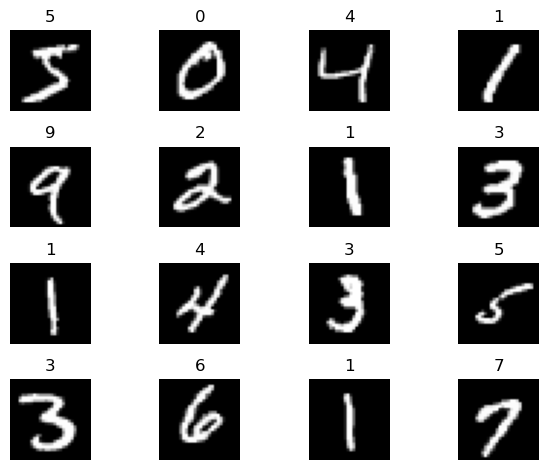

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
for i in range(16):
    ax = axes[i//4, i%4]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

# 전처리

In [30]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [33]:
print(f'최소값: {x_train.min()}, 최대값: {x_train.max()}')

최소값: 0, 최대값: 255


In [35]:
# 데이터 정규화
x_train = x_train / x_train.max()

print(f'최소값: {x_train.min()}, 최대값: {x_train.max()}')

최소값: 0.0, 최대값: 1.0


In [39]:
# test 셋 정규화
x_test = x_test / 255.

In [41]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [61]:
x_train = x_train.reshape(60000, -1)
print(x_train.shape)
sea = np.ndarray([1,2])

(60000, 784)


In [20]:
x_test = x_test.reshape(10000, -1)
print(x_test.shape)

(10000, 784)


# Sequential API

In [21]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(32, activation='relu', input_dim=784),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
# List 입력
model = Sequential([
    Dense(64,activation = 'relu', input_dim=784),
    Dense(10,activation = 'softmax')
])

# # add 함수
# model = Sequential()
# model.add(Dense(64,activation = 'relu', input_shape=(784,)))
# model.add(Dense(10,activation = 'softmax'))

# 입력 레이어

In [23]:
model = Sequential([
    Dense(64,activation = 'relu', input_shape=(784,)),
    Dense(10,activation = 'softmax')
])

# 활성화 함수

In [24]:
# Dense 레이어에 relu 활성화 함수를 적용
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_11, built=False>

In [25]:
# Activation 레이어에 relu 활성화 함수를 적용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

# 출력 레이어

In [26]:
# 회귀 분석: 출력층 노드 = 1인 경우
tf.keras.layers.Dense(1, activation='linear')

# 분류 분석: 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 분류 분석: 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

<Dense name=dense_15, built=False>

# 손실함수

출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우

In [27]:
# 회귀 분석
model.compile(loss='mse')

In [28]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [29]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

# 옵티마이저

In [31]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

# 평가지표

In [32]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [33]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련

In [34]:
# 훈련
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=5,
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2377 - loss: 4.4992 - val_accuracy: 0.1033 - val_loss: 4.8290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1089 - loss: 4.7980 - val_accuracy: 0.1051 - val_loss: 4.8203
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1276 - loss: 4.7146 - val_accuracy: 0.1817 - val_loss: 4.4513
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1743 - loss: 4.4838 - val_accuracy: 0.1841 - val_loss: 4.4402
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1839 - loss: 4.4566 - val_accuracy: 0.1721 - val_loss: 4.4979


# 평가

In [35]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1832 - loss: 4.4186
0.1720999926328659


# 추론

In [36]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

0
[0 0 1 0 0 1 0 0 0 0]
